##**Problem Statement**

As a data scientist in a
global finance company. Over the
years, the company has collected basic
bank details and gathered a lot of
credit-related information. The
management wants to build an
intelligent system to segregate the
people into credit score brackets to
reduce the manual efforts. Given a
person’s credit-related information,
build a machine learning model that
can classify the credit score.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv(r'C:\Users\saura\Downloads\Credit_Score\credit_score.csv')

C:\Users\saura\AppData\Local\Temp\ipykernel_26640\4080296252.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\saura\Downloads\Credit_Score\credit_score.csv')


In [6]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [7]:
df=df.drop(columns=["ID","Customer_ID", "Name","SSN", "Type_of_Loan", "Credit_History_Age"])
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Checking the shape of a dataframe and datatypes of all columns
along with calculating the statistical data.

In [8]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
df.isnull().sum() # checking null values


Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [24]:
# Only apply .str.replace if dtype is object (string)
if df["Age"].dtype == object:
	df["Age"] = df["Age"].str.replace("_", "")
df["Age"] = df["Age"].astype(int)

df["Occupation"] = df["Occupation"].replace("______", np.nan)

if df["Annual_Income"].dtype == object:
	df["Annual_Income"] = df["Annual_Income"].str.replace("_", "")
df["Annual_Income"] = df["Annual_Income"].astype(float)

if df["Num_of_Loan"].dtype == object:
	df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_", "")
df["Num_of_Loan"] = df["Num_of_Loan"].astype(float)

if df["Num_of_Delayed_Payment"].dtype == object:
	df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_", "")
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)

df["Credit_Score"] = df["Credit_Score"].replace("_", "")
df["Credit_Score"] = df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0, 1, 2])

if df["Monthly_Balance"].dtype == object:
	df["Monthly_Balance"] = df["Monthly_Balance"].str.replace("_", "")
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float)

df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", np.nan)

if df["Amount_invested_monthly"].dtype == object:
	df["Amount_invested_monthly"] = df["Amount_invested_monthly"].str.replace("_", "")
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)

df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM", "No")
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace(["Yes", "No"], [1, 0])

if df["Outstanding_Debt"].dtype == object:
	df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_", "")
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)

df["Credit_Mix"] = df["Credit_Mix"].replace(["Bad", "Standard", "Good"], [0, 1, 2])

if df["Changed_Credit_Limit"].dtype == object:
	df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].replace("_", np.nan)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)



Non-numeric column: Credit_Mix
['_' 2 1 0]
Underscore found in column: Credit_Mix
['_']


In [13]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,_,809.98,26.822620,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23,Scientist,19114.12,NaN,3,4,3,4.0,-1,...,4.0,2,809.98,31.944960,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,-500,Scientist,19114.12,NaN,3,4,3,4.0,3,...,4.0,2,809.98,28.609352,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23,Scientist,19114.12,NaN,3,4,3,4.0,5,...,4.0,2,809.98,31.377862,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,2,809.98,24.797347,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [14]:
df.isnull().sum()  # checking null values after cleaning

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [15]:
df=df.fillna(method='ffill')  # forward fill to handle NaN values
df=df.fillna(method='bfill')  # backward fill to handle any remaining NaN values


C:\Users\saura\AppData\Local\Temp\ipykernel_26640\1693345537.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')  # forward fill to handle NaN values
C:\Users\saura\AppData\Local\Temp\ipykernel_26640\1693345537.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='bfill')  # backward fill to handle any remaining NaN values


In [16]:
df.isnull().sum()  # checking null values after cleaning

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [17]:
df.head(20)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,_,809.98,26.822620,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23,Scientist,19114.12,1824.843333,3,4,3,4.0,-1,...,4.0,2,809.98,31.944960,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,-500,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,2,809.98,28.609352,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23,Scientist,19114.12,1824.843333,3,4,3,4.0,5,...,4.0,2,809.98,31.377862,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,2,809.98,24.797347,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2
5,June,23,Scientist,19114.12,1824.843333,3,4,3,4.0,8,...,4.0,2,809.98,27.262259,0,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,2
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,2,809.98,22.537593,0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,2
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,2,809.98,23.933795,0,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,1
8,January,28,_______,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,2,605.03,24.464031,0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1.0,7,...,2.0,2,605.03,38.550848,0,18.816215,40.391238,High_spent_Large_value_payments,484.591214,2


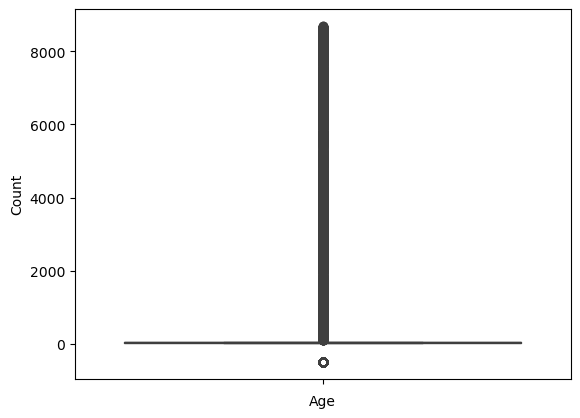

In [18]:
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel('Count')
plt.show()

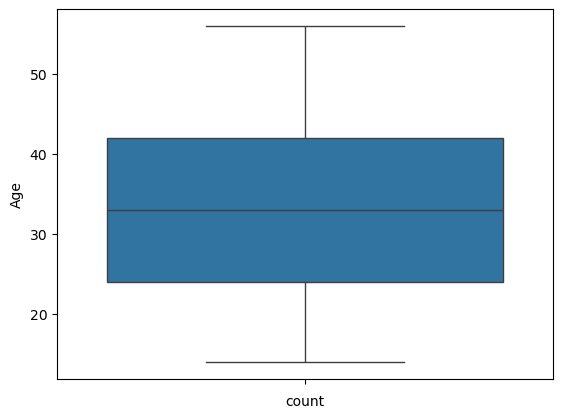

In [19]:
col_names=["Age"]
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
data = df[(df.Age >= (Q1 - 1.5 * IQR)) & (df.Age <= (Q3 + 1.5 * IQR))]
sns.boxplot(data["Age"])
plt.xlabel('count')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df["Month"]=le.fit_transform(df["Month"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df["Payment_Behaviour"]=le.fit_transform(df["Payment_Behaviour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

# Feature Selection

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype !='object') & (col != 'Credit_Score')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.275594
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13          Outstanding_Debt  0.396141
14  Credit_Utilization_Ratio  0.024506
15     Payment_of_Min_Amount  0.476749
16       Total_EMI_per_month  0.972258
17   Amount_invested_monthly  0.911321
18         Payment_Behaviour  0.310525
19           Monthly_Balance  1.000207


# Logistic Regression

In [27]:
X=df.drop(columns=["Credit_Score"])
y=df["Credit_Score"]

# Ensure all columns in X are numeric
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns found:", non_numeric_cols)
    # Optionally, drop or encode them
    X = X.drop(columns=non_numeric_cols)

# Now proceed with train-test split and scaling
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score
pd.DataFrame({"actual_values": y_test, "predicted_values": y_pred})


Non-numeric columns found: Index(['Credit_Mix'], dtype='object')


,actual_values,predicted_values
75721,2,1
80184,0,0
19864,2,2
76699,0,1
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)
pd.DataFrame({"actual_val"
"ue":y_test,'predicted_value':y_pred})


,actual_value,predicted_value
75721,2,1
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


In [44]:
dt_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")

Decision Tree Accuracy: 68.88%


Hyperparameter Tuning on Decision Tree

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,3,5,10,50],
              'min_samples_split': [2,3,50,100],
              'min_samples_leaf': [1,5,8,10]
              }


In [47]:
grid_obj = GridSearchCV(dt, parameters)
grid_obj = grid_obj.fit(x_train, y_train)
dt = grid_obj.best_estimator_
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc_dt = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Decision Tree Model :', acc_dt)

c:\Users\saura\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saura\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\saura\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\saura\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\saura\anaconda3\Lib\site-packa

Accuracy of Decision Tree Model : 68.97


Random forest


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred =rfc.predict(x_test)
accuracy_score(y_test, y_pred)
pd.DataFrame({"Actual_Value": y_test, "Predicted_Value": y_pred})

,Actual_Value,Predicted_Value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1
